In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 9.1 A Brief matplotlib API Primer

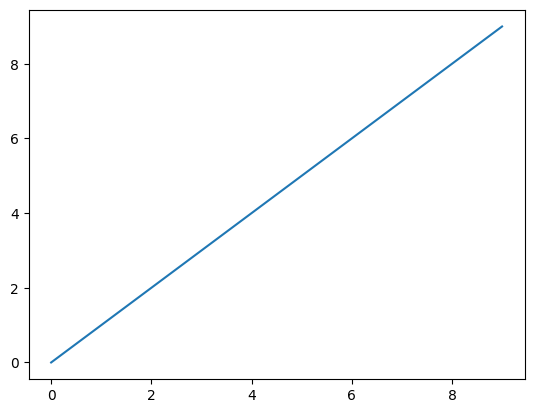

In [4]:
data = np.arange(10)
plt.plot(data)

## Figures and Subplots

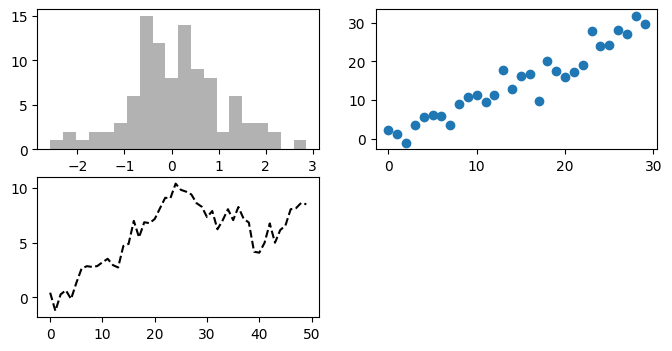

In [17]:
# plots live within a figure
# figsize guarantees a certain size and aspect ratio is used when saved to disk
fig = plt.figure(figsize=(8, 4))

# use axis methods instead of top-level plotting functions!
# have to create a subplot before plotting
ax1 = fig.add_subplot(2, 2, 1)  # 2x2 plots, select the first one
ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3) # alpha makes the content transparent

ax2 = fig.add_subplot(2, 2, 2)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30))

ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(np.random.standard_normal(50).cumsum(), color="black", linestyle="dashed")

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

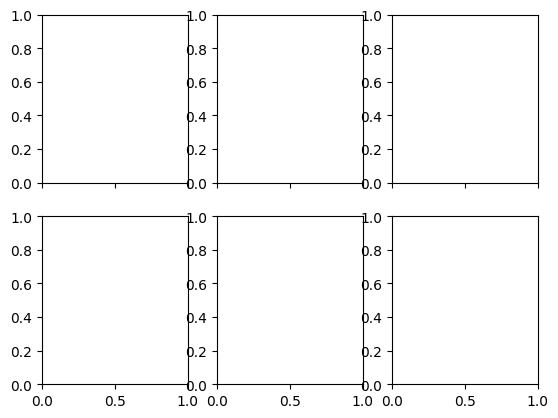

In [20]:
# convenient function of creating subplots
fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True)
axes

In [19]:
# axes can be indexed like a two-dimensional array
axes[0, 1]

<Axes: >

In [ ]:
# other parameters: sharex, sharey, subplot_kw (parameters passed to add_subplot)

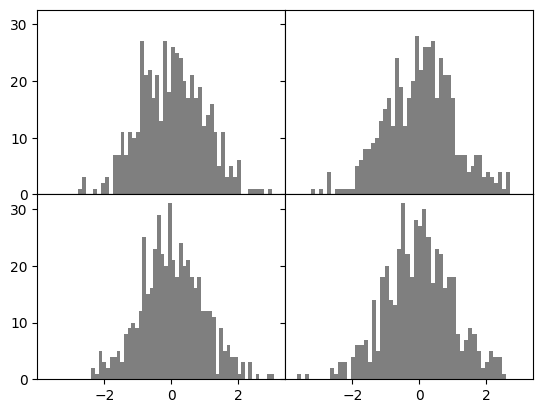

In [21]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=50, color="black", alpha=0.5)
fig.subplots_adjust(wspace=0, hspace=0)

# by default there is some space between the plots -> subplots_adjust lets you specify how much space is left

- all plots in matplotlib are in a `Figure` object, created using `plt.figure()`
- use `fig.add_subplot()` to add a subplot
- the returned axis object has methods, such as `plot()`, `scatter()` or `hist()`, to create a plot
- there is a convenient `plt.subplots(nrows, ncols, sharex, sharey, subplot_kw)` function that creates the figure and a number of subplots (returning `fig, ax`)
- `fig.subplots_adjust()` can be used to customize spacing between graphs

## Colors, Markers and Line Styles

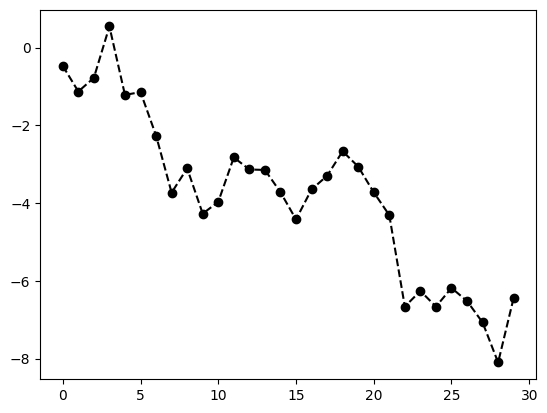

In [23]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.random.standard_normal(30).cumsum(), color="black", linestyle="dashed", marker="o")

# marker adds markers to indicate the values
# linestyle lets us specify a styling for the line
# color changes the color of the content

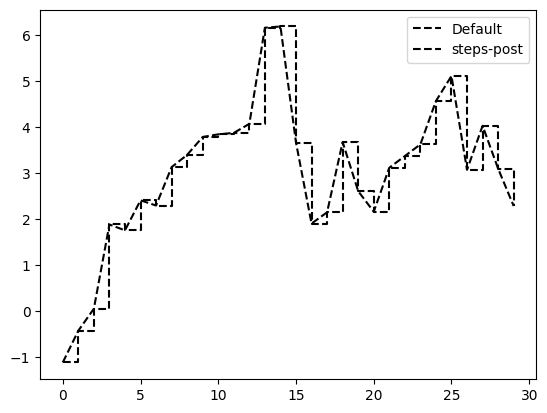

In [26]:
# in line plots, points are linearly interpolated by default
# this can be overriden

fig = plt.figure()
ax = fig.add_subplot()

data = np.random.standard_normal(30).cumsum()

ax.plot(data, color="black", linestyle="dashed", label="Default")
ax.plot(data, color="black", linestyle="dashed", label="steps-post", drawstyle="steps-post")
ax.legend() # adds a small legend to the plot

- the `plot()` function has several parameters to change plot styling
- `linestyle` can be used to change the styling of the line
- `color` changes the color of the line
- `marker` adds markers at each data point
- `drawstyle` changes the interpolation method between data points

## Ticks, Labels and Legends

Text(0.5, 1.0, 'My first plot')

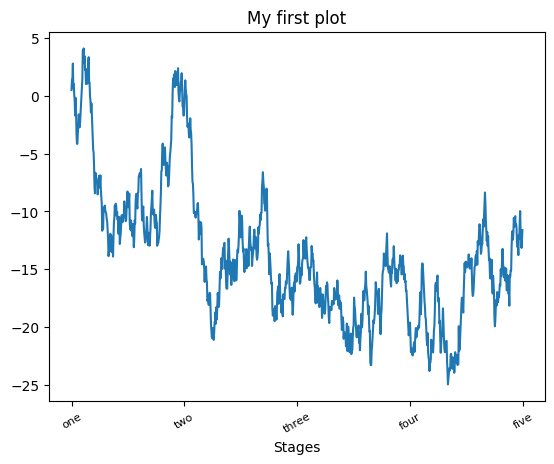

In [30]:
# most plot decorations can be accessed through methods on the matplotlib axes objects
# like xlim, xticks and xticklabels (or y)
# called without arguments, you get back the current value parameter
# calling with parameters sets the parameter

fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum())

# change axis ticks
ax.set_xticks([0, 250, 500, 750, 1000])

# change labels of axis ticks
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"], rotation=30, fontsize=8)

# add label
ax.set_xlabel("Stages")

ax.set_title("My first plot")

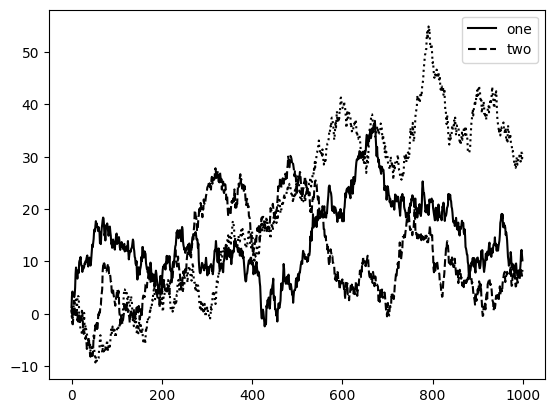

In [37]:
fig, ax = plt.subplots()

ax.plot(np.random.randn(1000).cumsum(), color="black", label="one")
ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dashed", label="two")
ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dotted", label="_nolegend_")  # pass in _nolegend_ to exclude from plot

ax.legend(loc="upper right") # to add legend; use loc to change location

- `set_xticks` can be used to specify custom tick locations
- `set_xticklabels` can be used to specify custom tick text (also allowing changing the `rotation` and `fontsize`)
- `set_xlabel` can be used to add an x-axis label
- `set_title` adds a title to the subplot
- when adding a plot to an axis, the `label` parameter can be used to add a label to the content
- `ax.legend()` will then create a legend containing these labels
- the legend location can be customized using the `loc` parameter
- when assigning `label="_nolegend_"`, the label will be left out of the plot

## Annotations and Drawing on a Subplot

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

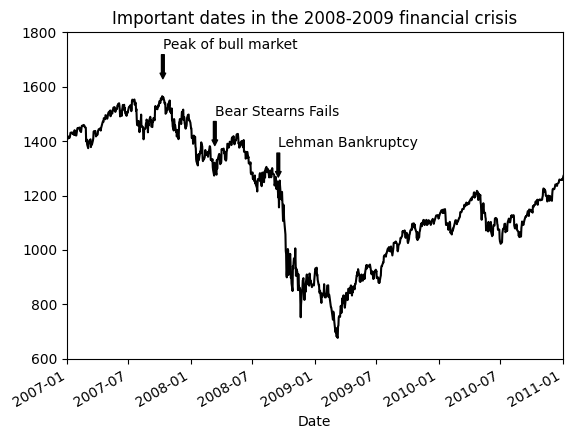

In [41]:
from datetime import datetime

fig, ax = plt.subplots()

data = pd.read_csv("examples/spx.csv", index_col=0, parse_dates=True)
spx = data["SPX"]

spx.plot(ax=ax, color="black")

crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]

for date, label in crisis_data:
    ax.annotate(
        label,  # displayed text
        xy=(date, spx.asof(date) + 75), # define position
        xytext=(date, spx.asof(date) + 225), # define position of text
        arrowprops=dict(facecolor="black", headwidth=4, width=2, headlength=4), # define arrow styling
        horizontalalignment="left", verticalalignment="top")

ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])

ax.set_title("Important dates in the 2008-2009 financial crisis")

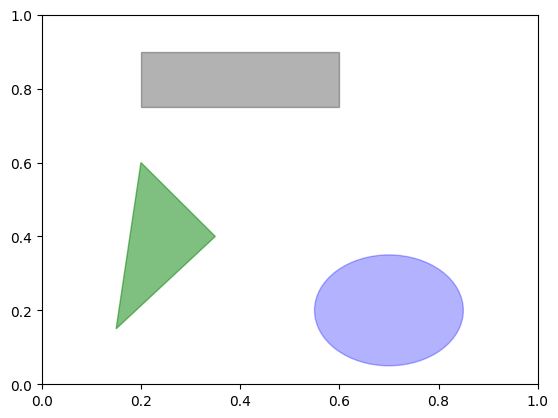

In [42]:
# drawing shapes
fig, ax = plt.subplots()

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color="green", alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

- `ax.annotate` can be used to add text annotations to plots
- and `ax.patch` to add patches
- several patches exist, such as `plt.Rectangle`, `plt.Circle` and `plt.Polygon`

## Saving Plots to File

In [43]:
fig.savefig("fig.svg")

In [45]:
# specify dpi
fig.savefig("fig.png", dpi=400)

- use `fig.savefig()` to save a figure
- the file type is inferred through the file name
- the `dpi` parameter can be used on some file formats to set the dpi
- the `facecolor` parameter can be used to update the background color outside the subplots
- the format can be set explicitly as well, using the `format` parameter

## matplotlib Configuration

In [75]:
# rc method can be used to modify defaults
plt.rc("figure", figsize=(10, 5))

- use `plt.rc()` to change default parameters
- the function takes in a component (e.g. `figure`, `xtick`, `axes`...) and a sequence of keyword arguments
- use `plt.rcdefaults()` to restore defaults
- you can also create a `.matplotlibrc` file that gets loaded each time matplotlib is used

# 9.2 Plotting with pandas and seaborn

`seaborn` is a more high-level statistical graphics library built on `matplotlib` that integrates well with `pandas`. It simplifies many common visualization types.

## Line Plots

<Axes: >

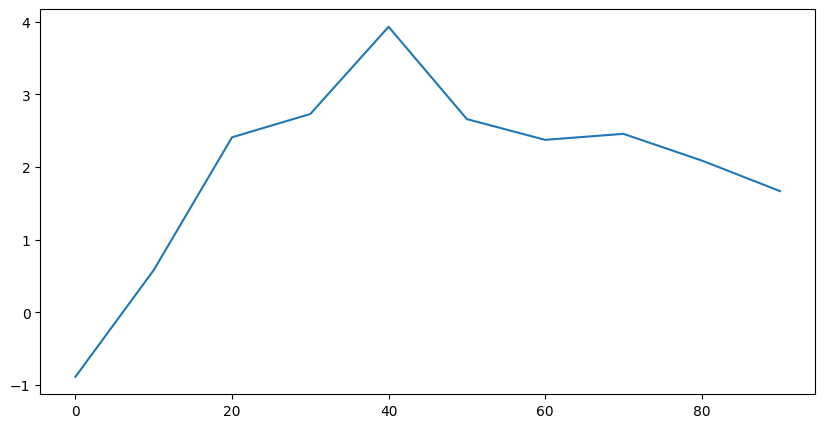

In [55]:
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0, 100, 10))

# series and dataframe both have a plot method
# by default, a Serie's index is used on the x-axis
# the method has many parameters, like label, ax, style, alpha, kind, figsize...
s.plot(figsize=(10, 5))

<Axes: >

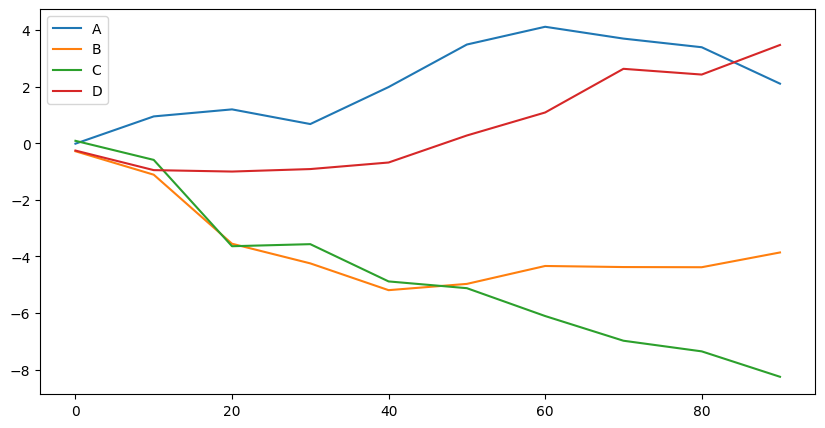

In [54]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0), columns=["A", "B", "C", "D"], index=np.arange(0, 100, 10))

# on a dataframe, for each column a line is created on the same subplot
df.plot(figsize=(10, 5))

- using `plot()` on a series and dataframe will create a line plot by default
- the index is used for the x-axis
- the function has many parameters to control styling, content and layout
    - `label`: adds a label to the plot legend
    - `ax`: Pass in a matplotlib axis to plot the plot on a custom one
    - `style`: Change styling
    - `kind`: Change the kind of plot, e.g.`"line"`, `"bar"`, `"hist"`...
    - ...
- on a dataframe, the function will create one line per column
- there are dataframe specific arguments as well:
    - `subplots`: Plot each DF column in a separate subplot
    - `sharex` and `sharey`
    - `legend`
    - `sort_columns`: Plot columns in alphabetical order

## Bar Plots

<Axes: >

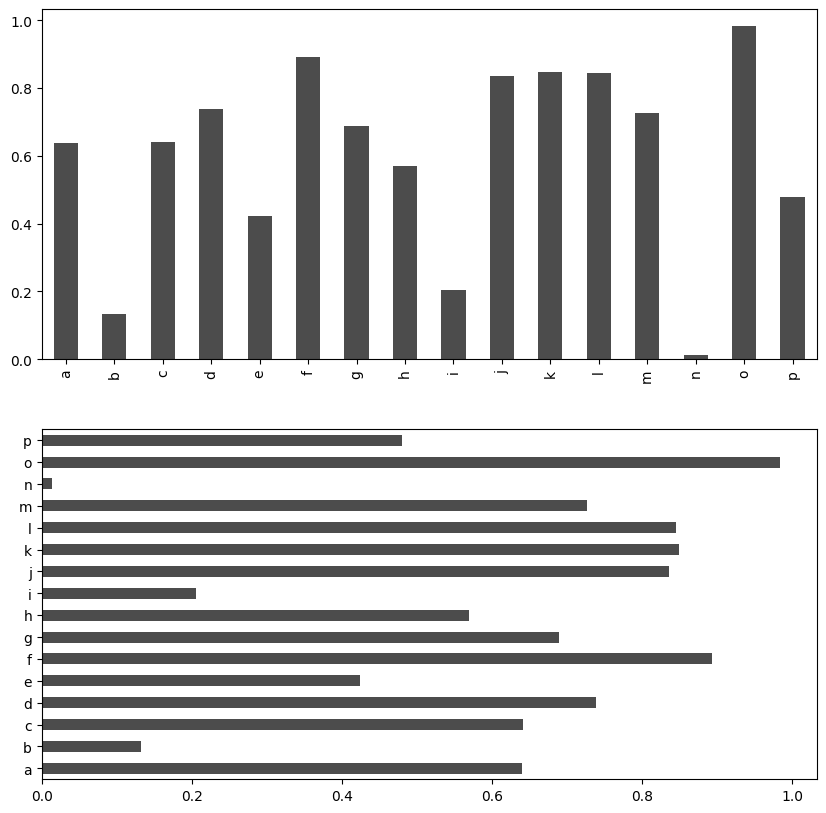

In [57]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))

data.plot.bar(ax=axes[0], color="black", alpha=0.7)
data.plot.barh(ax=axes[1], color="black", alpha=0.7)

<Axes: >

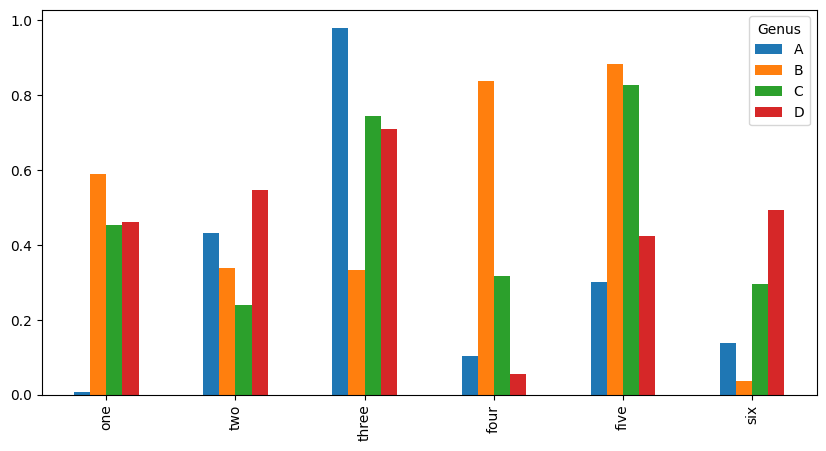

In [60]:
df = pd.DataFrame(np.random.uniform(size=(6, 4)), index=["one", "two", "three", "four", "five", "six"], columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df.plot.bar(figsize=(10, 5))

# on a dataframe, bar plots group the values according to the index
# the column name is used to title the legend

<Axes: >

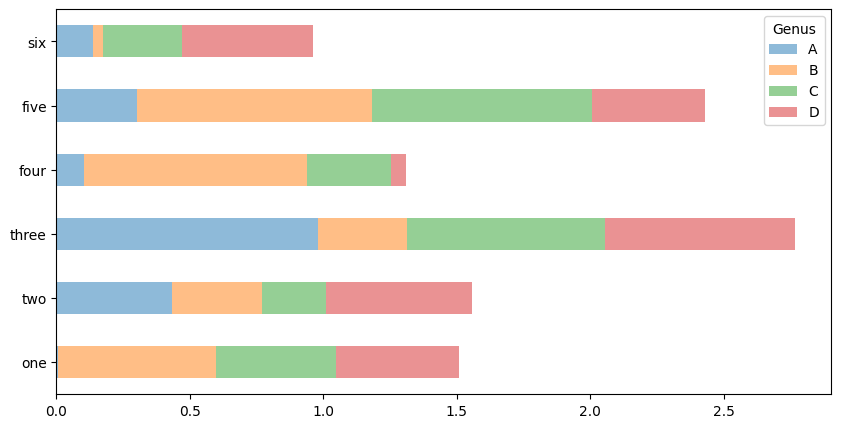

In [62]:
df.plot.barh(stacked=True, alpha=0.5, figsize=(10, 5))  # stack according to index

In [63]:
tips = pd.read_csv("examples/tips.csv")
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [66]:
# computes a frequency table: for each unique value in "day" and "size" it computes the frequency of how many times this combination exists in the df
party_counts = pd.crosstab(tips["day"], tips["size"])
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [70]:
party_counts.sum(axis="columns")

day
Thur    58
Fri     18
Sat     85
Sun     75
dtype: int64

In [67]:
# remove one and six person parties
party_counts = party_counts.loc[:, 2:5]

In [71]:
party_pcts = party_counts.div(party_counts.sum(axis="columns"), axis="index")   # divide each entry with the first parameter
party_pcts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


<Axes: xlabel='day'>

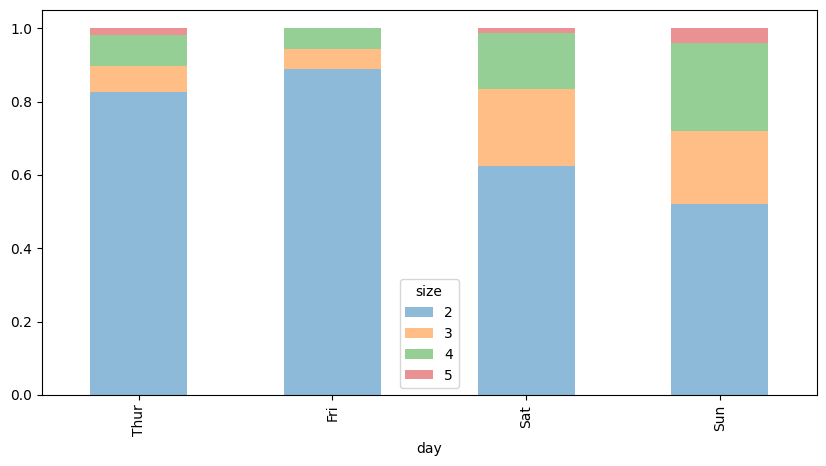

In [76]:
party_pcts.plot.bar(stacked=True, alpha=0.5)

In [77]:
# seaborn can help with aggregation and summarization
%conda install seaborn

2 channel Terms of Service accepted
Retrieving notices: done
Channels:
 - defaults
Platform: linux-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 25.5.1
    latest version: 25.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/nico/miniconda3/envs/data-science

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    aom-3.12.1                 |       h7934f7d_0         2.8 MB
    bottleneck-1.4.2           |  py312haa0f9ac_1         134 KB
    contourpy-1.3.3            |  py312hdb19cb5_0        11.3 MB
    cycler-0.11.0              |     pyhd3eb1b0_0          12 KB
    fonttools-4.61.0           |  py312h47b2149_0         4.1 MB
    jpeg-9f                    |       h5ce9db8_0         242 KB
    kiwisolver-1.4.9   

In [78]:
import seaborn as sns

tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<Axes: xlabel='tip_pct', ylabel='day'>

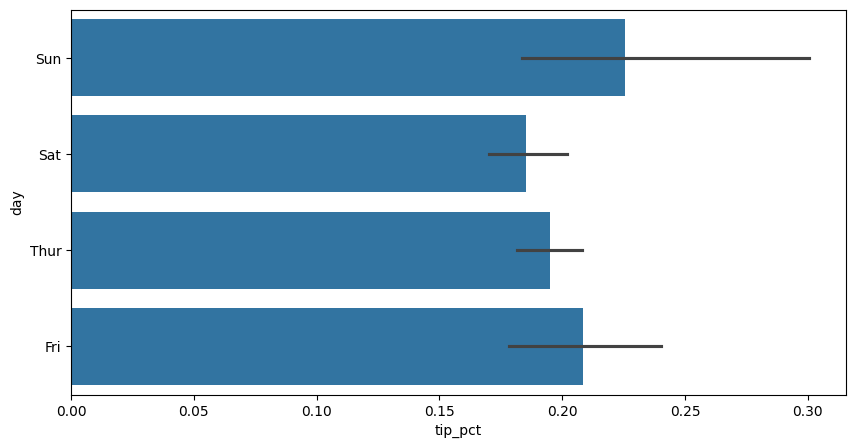

In [80]:
sns.barplot(x="tip_pct", y="day", data=tips, orient="h")    # the plot automatically adds a confidence interval

<Axes: xlabel='tip_pct', ylabel='day'>

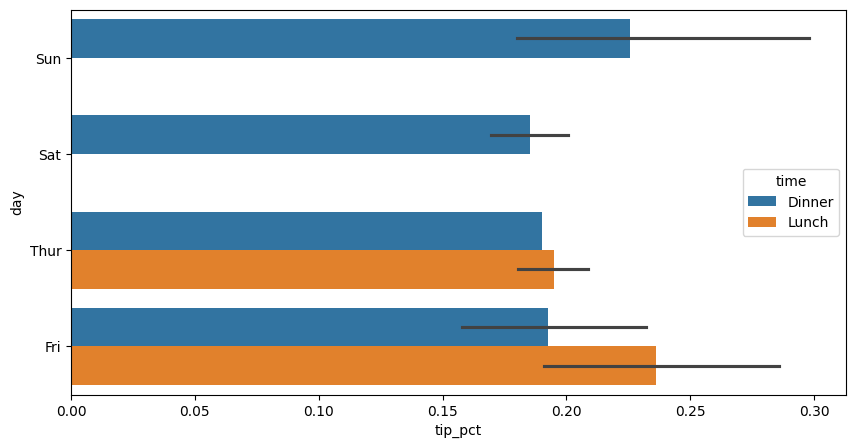

In [81]:
# using the hue parameter, an additional column can be specified that will be used to split by a categorical value
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")

<Axes: xlabel='tip_pct', ylabel='day'>

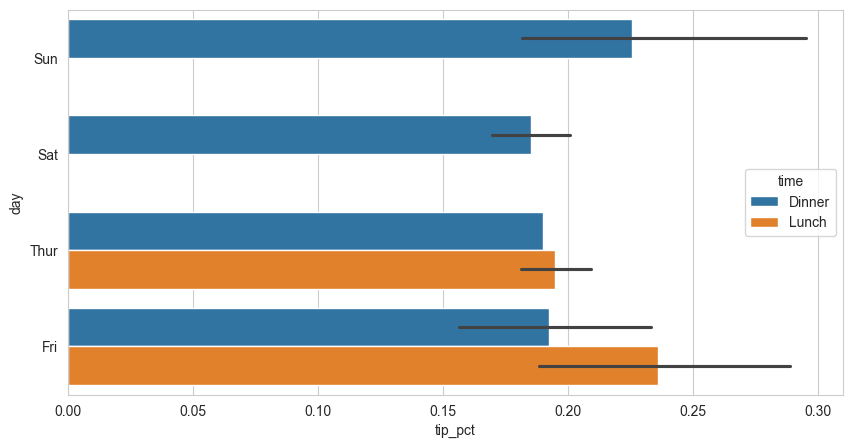

In [83]:
# you can change the plot aesthetics
sns.set_style("whitegrid")
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")

<Axes: xlabel='tip_pct', ylabel='day'>

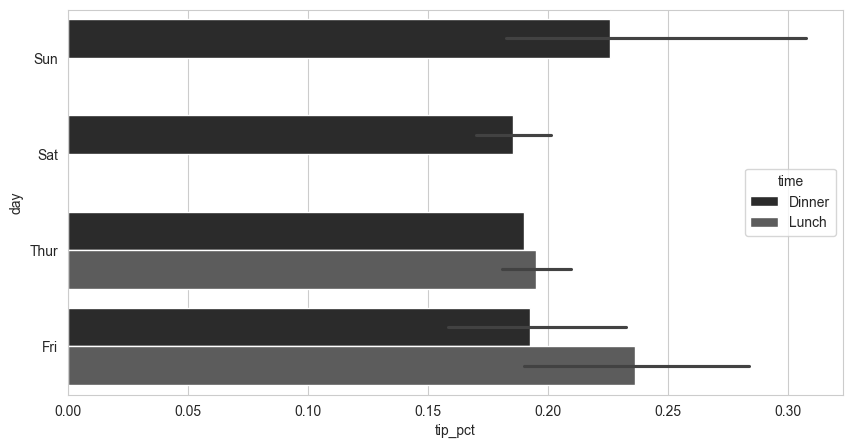

In [84]:
# or color palette
sns.set_palette("Greys_r")
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")

- `plot.bar()` and `plot.barh()` (on series or df) create a barplot
- on a dataframe, the values are grouped based on the index
- the column name will be used as the legend title
- using the `stacked` parameter, we can create a stacked bar plot
- `seaborn` can be used to make plotting that requires summarization or aggregation easier
- e.g. the function `barplot` can create mean plots with confidence intervals with a single function call
- the function takes in a dataframe, `x` parameter and `y` parameter
- optionally specifying `hue` will allow splitting the data by a categorical feature
- `sns.set_style()` can be used to change styling
- and `sns.set_palette()` to change color palette

## Histogram and Density Plots

<Axes: ylabel='Frequency'>

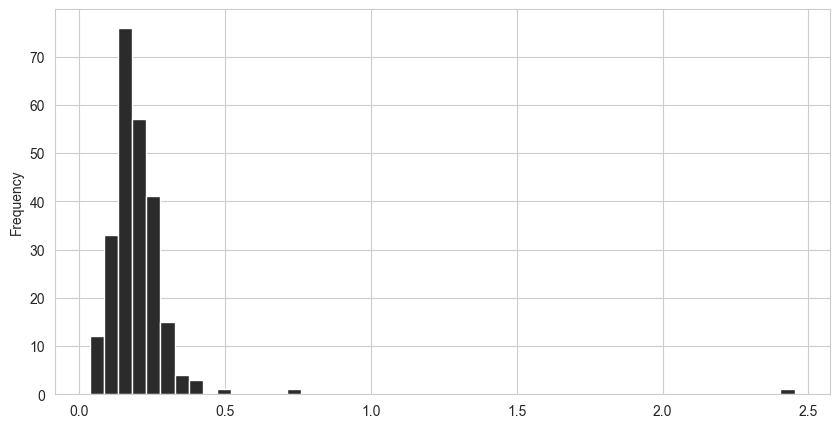

In [85]:
tips["tip_pct"].plot.hist(bins=50)

<Axes: ylabel='Density'>

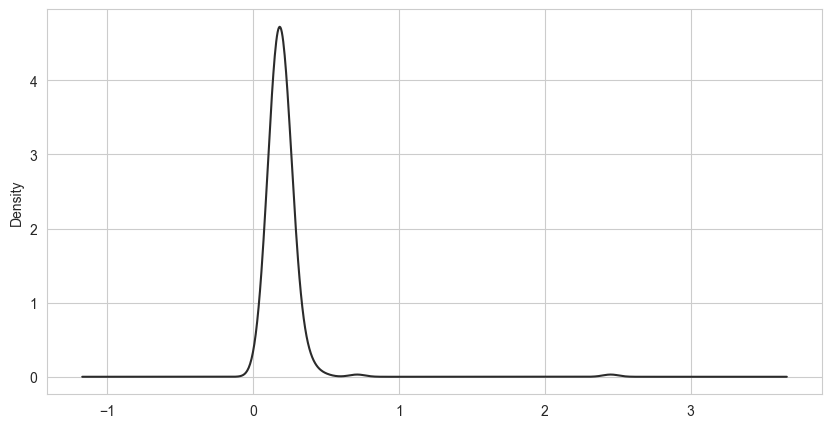

In [88]:
# density plots are formed by estimating a continuous probability distribution
tips["tip_pct"].plot.density()

<Axes: xlabel='tip_pct', ylabel='Count'>

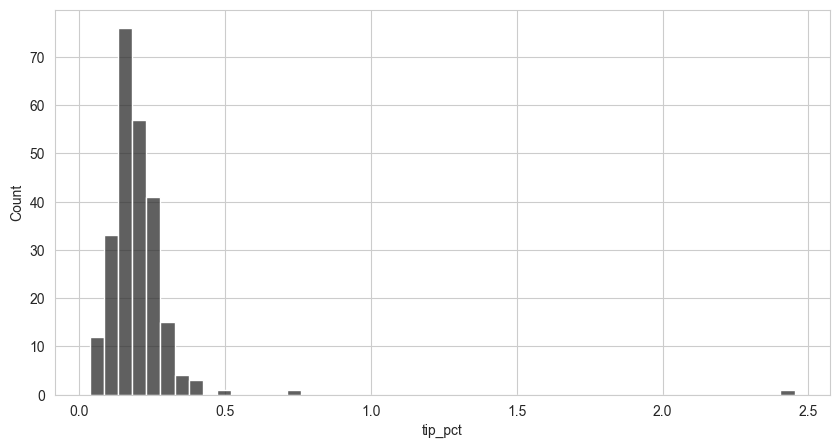

In [93]:
sns.histplot(tips, x="tip_pct", bins=50)

<Axes: xlabel='tip_pct', ylabel='Count'>

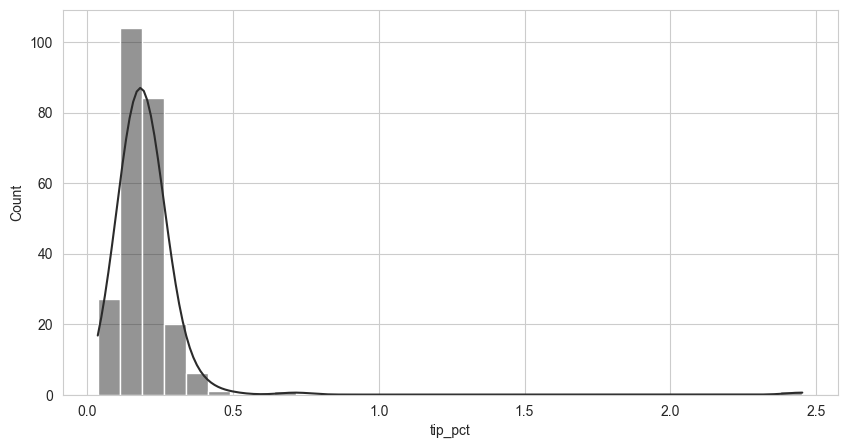

In [95]:
sns.histplot(tips, x="tip_pct", kde=True)

- `hist()` can be used to create histograms
- `density()` can be used for density plots
- in seaborn, both plots are created using `histplot()`
- the `kde` parameter specifies whether to add a density plot

## Scatter or Point Plots

In [96]:
macro = pd.read_csv("examples/macrodata.csv")
data = macro[["cpi", "m1", "tbilrate", "unemp"]]
trans_data = np.log(data).diff().dropna()
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log(m1) versus log(unemp)')

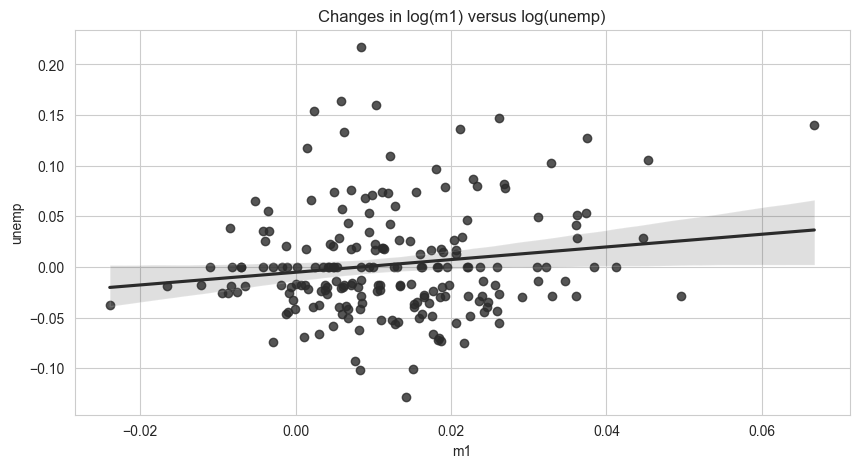

In [97]:
# regplot creates a scatterplot and automatically fits a linear regression
ax = sns.regplot(x="m1", y="unemp", data=trans_data)
ax.set_title("Changes in log(m1) versus log(unemp)")

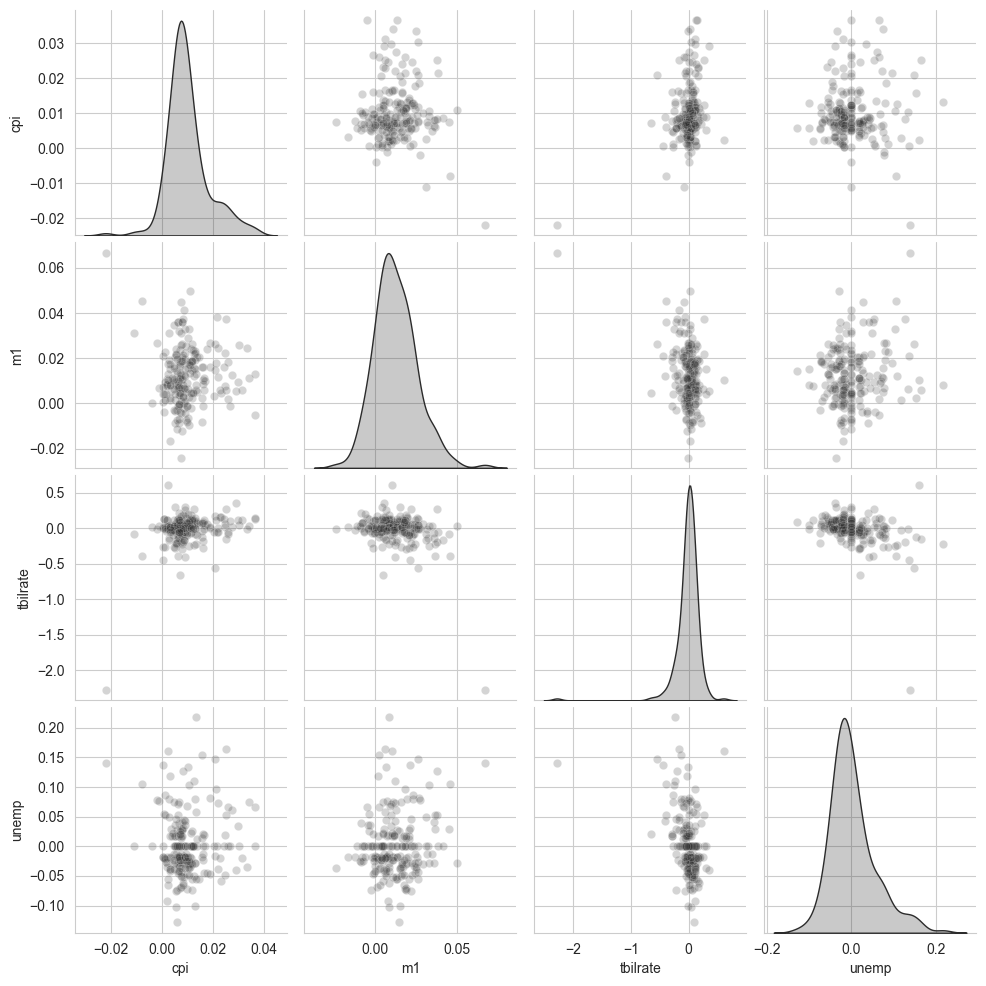

In [98]:
# seaborn also has a function to create a scatterplot matrix
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha": 0.2})  # plot_kws can be used to pass in kwargs to the individual plotting calls

- `sns.regplot` easily creates a scatterplot with linear regression
- `sns.pairplot` creates a scatterplot matrix

## Facet Grids and Categorical Data

A facet grid is a type of 2D plot, where the data is split by some categorical values

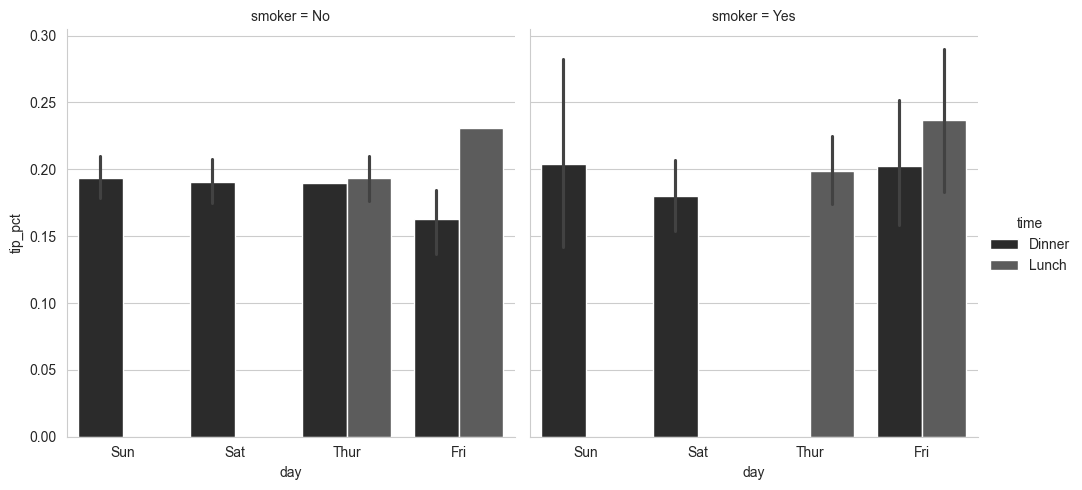

In [99]:
sns.catplot(x="day", y="tip_pct", hue="time", col="smoker", kind="bar", data=tips[tips.tip_pct < 1])

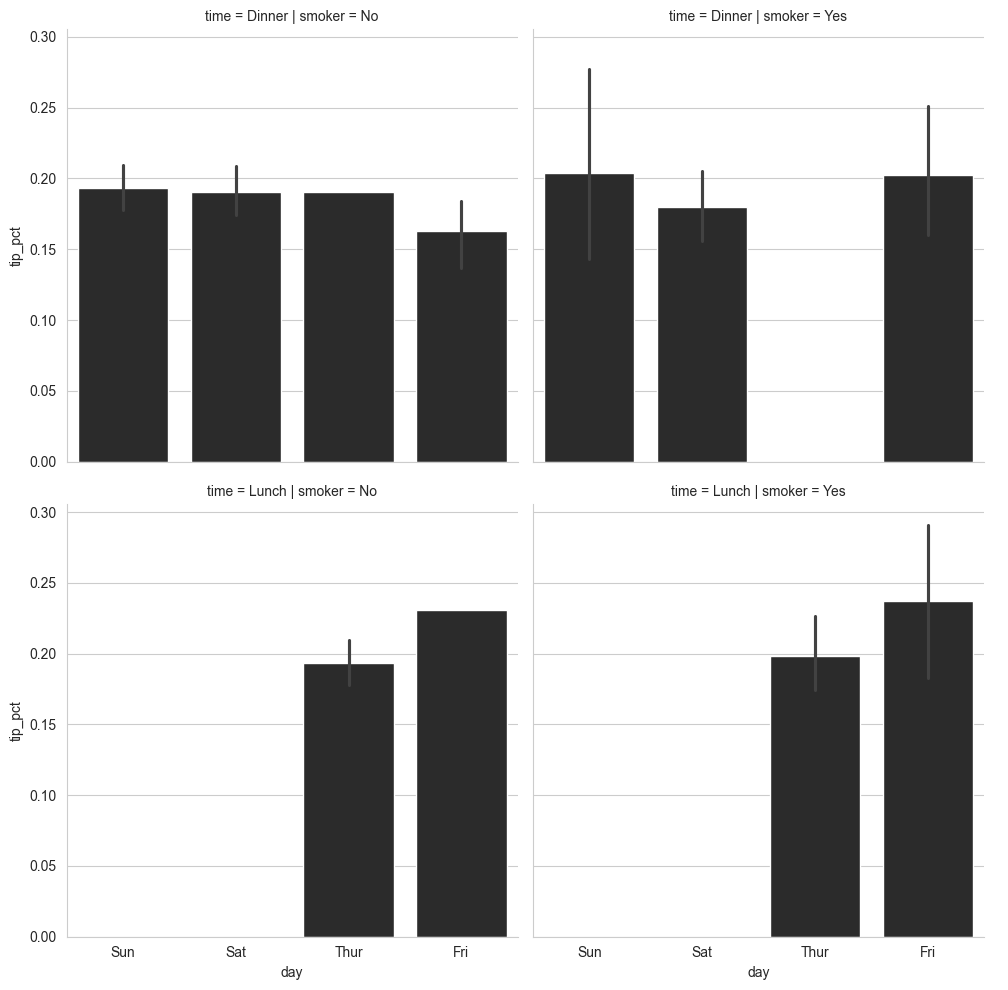

In [100]:
# add another dimension
sns.catplot(x="day", y="tip_pct", row="time", col="smoker", kind="bar", data=tips[tips.tip_pct < 1])

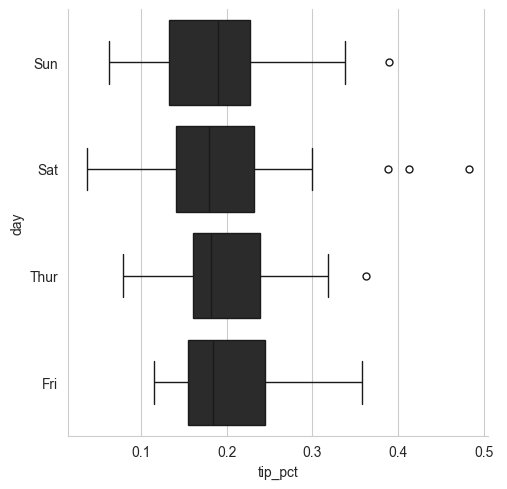

In [101]:
# other plot types are supported as well
sns.catplot(x="tip_pct", y="day", kind="box", data=tips[tips.tip_pct < 0.5])

- a facet grid is a 2D plot layout, where the data is split by some categorical value
- `sns.catplot()` creates such plots
- the function has a parameter `x` to specify the column to use for the x-axis and `y` for the y-axis
- the parameter `hue` can be used to create groups inside a plot
- the parameter `col` determines which dataframe column to use for splitting the data into several subplots
- `row` behaves similarly
- the functions plot type can be changed using the `kind` parameter